Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   case_id        30 non-null     object
 1   crime_type     30 non-null     object
 2   location       30 non-null     object
 3   date           30 non-null     object
 4   evidence_type  30 non-null     object
 5   status         30 non-null     object
 6   month          30 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB
None

Sample Data:
  case_id   crime_type location        date evidence_type  status   month
0  FQ-101        Theft   Mumbai  05-01-2024          CCTV    Open  Jan-24
1  FQ-102  Cyber Crime    Delhi  08-01-2024          Logs  Closed  Jan-24
2  FQ-103      Assault   Mumbai  12-01-2024       Witness    Open  Jan-24
3  FQ-104        Fraud     Pune  15-01-2024     Documents    Open  Jan-24
4  FQ-105        Theft   Mumbai  20-01-2024          CCTV  Closed  Jan-

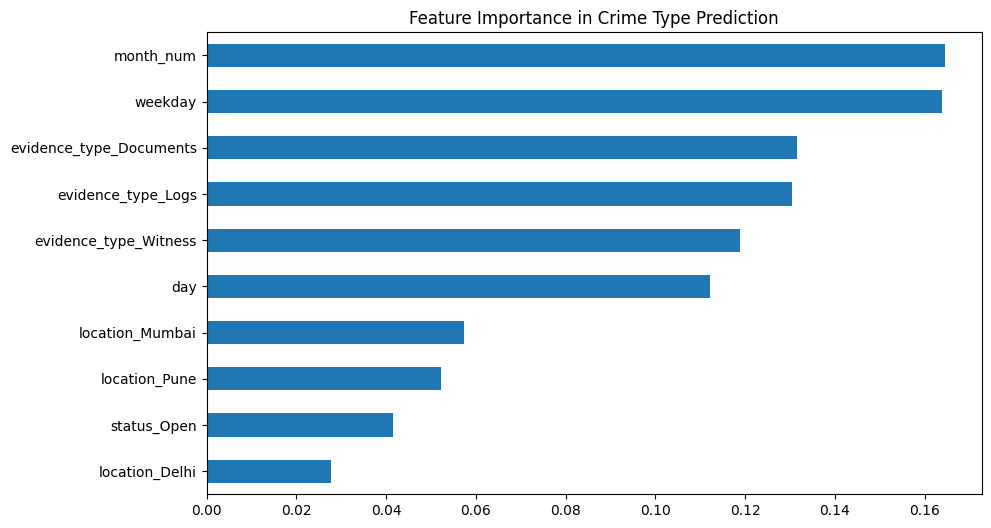

In [1]:

import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

#load the dataset
df = pd.read_csv("crime_data.csv")

print("Data info:")
print(df.info())

print("\nSample Data:")
print(df.head())

print("\nCrime Type Counts:")
print(df['crime_type'].value_counts())

#Preprocessing and feature engg.
df['date'] = pd.to_datetime(df['date'], errors='coerce')

#drop rows with invalid dates
df = df.dropna(subset=['date'])

# date-based features
# Date-based features
df['day'] = df['date'].dt.day
df['month_num'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

# Drop rows with missing values (IMPORTANT)
df = df.dropna()

y = df['crime_type']
X = df.drop(columns=['crime_type', 'case_id', 'date', 'month'])

# Encode categorical features
X = pd.get_dummies(X, columns=['location','evidence_type', 'status'], drop_first=True)

# Final check
print("\nFeatures dtypes: ")
print(X.dtypes)

print("\nMissing values in X: ")
print(X.isnull().sum())

#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#evaluate model
print("\nAccuracy score: ", accuracy_score(y_test, y_pred))
print("\nConfusion matrix: ", confusion_matrix(y_test,y_pred))
print("\nClassification report: ", classification_report(y_test,y_pred))

#visualization
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance in Crime Type Prediction")
plt.show()